In [1]:
folder = "XXX_XXX_XXX"

In [2]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

from CCfun import load_ccd_file
from CCfun import select_crystal_filenames
from CCfun import load_as_df

from CCplot import plot1d
from CCplot import plot2d
from CCplot import auto_plot_style

In [3]:
%matplotlib inline

auto_plot_style()

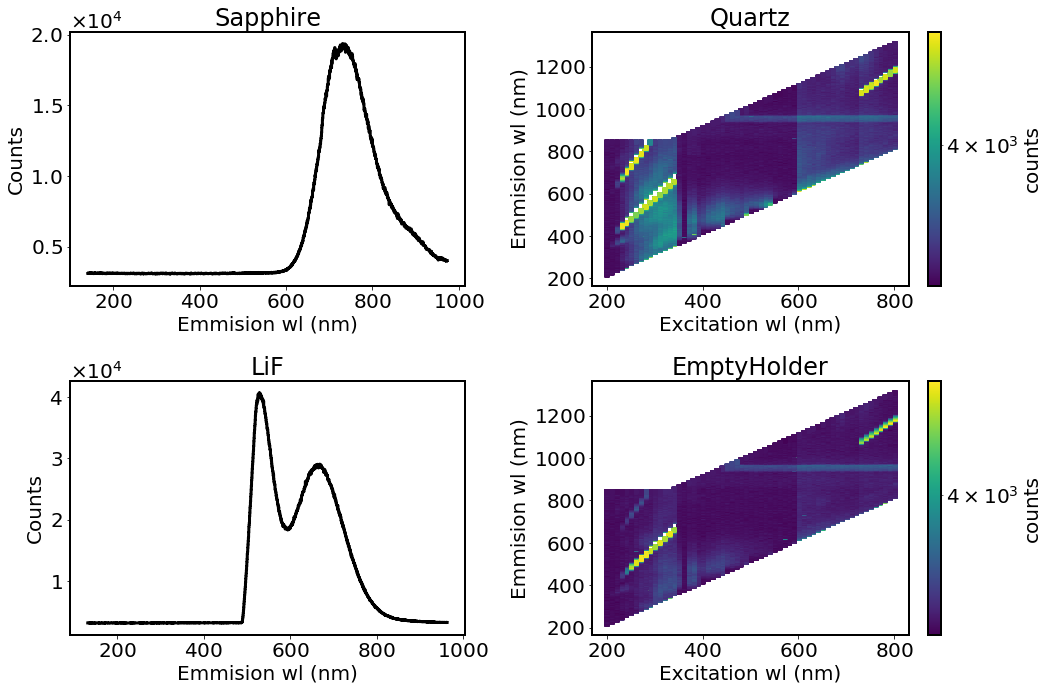

In [9]:
plt.figure(figsize=(15, 10))
positions = {0:1, 1:2, 2:4, 3:3}

for crystal, name in enumerate("Sapphire Quartz EmptyHolder LiF".split()):
    filenames = select_crystal_filenames(folder, crystal)
    ex        = 1 if name == "LiF" else 10
    dataframe = load_as_df(filenames)
    dataframe = dataframe[dataframe.grating    ==     2]
    dataframe = dataframe[dataframe.slit_width ==  1000]
    dataframe = dataframe[dataframe.exposure   ==    ex]
    dataframe = dataframe[dataframe.looparound == False]

    plt.subplot(2, 2, positions[crystal])
    if name in ["Sapphire", "LiF"]:
        plot1d(dataframe.em_wl ,
               dataframe.counts,
               title=name, log=False)
    else:
        plot2d(dataframe.ex_wl .values,
               dataframe.em_wl .values,
               dataframe.counts.values,
               title=name, log=True, cmax=5e3)
    
plt.tight_layout()